In [79]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform
from sklearn.linear_model import Lasso, ElasticNet, Ridge, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR
import missingno as misno

In [80]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
buat_eda=train.copy()

In [81]:
train

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


In [82]:
test

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258
10190,25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221
10191,25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724
10192,25481,12.5,0.25,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.407374,0.409261,31.881847


# EDA

In [83]:

#checking value in every column
for i in buat_eda:
    print(buat_eda[i].value_counts())

0        1
10197    1
10185    1
10186    1
10187    1
        ..
5101     1
5102     1
5103     1
5104     1
15288    1
Name: id, Length: 15289, dtype: int64
25.0    8245
12.5    6717
37.5     265
20.0      56
10.0       4
40.0       2
Name: clonesize, dtype: int64
0.500     7832
0.250     7285
0.750      110
0.537       38
0.000       16
18.430       5
6.640        3
Name: honeybee, dtype: int64
0.250    10856
0.380     4376
0.117       39
0.000        5
0.042        3
0.058        2
0.065        2
0.585        2
0.293        2
0.560        1
0.260        1
Name: bumbles, dtype: int64
0.380    4565
0.500    4165
0.630    3042
0.750    1828
0.250    1624
0.409      43
0.000       8
0.229       4
0.490       2
0.147       2
0.707       1
0.240       1
0.560       1
0.101       1
0.234       1
0.235       1
Name: andrena, dtype: int64
0.630    4763
0.500    4699
0.750    4387
0.250     872
0.380     509
0.058      42
0.000       6
0.021       4
0.117       2
0.620       1
0.585       1


<AxesSubplot:>

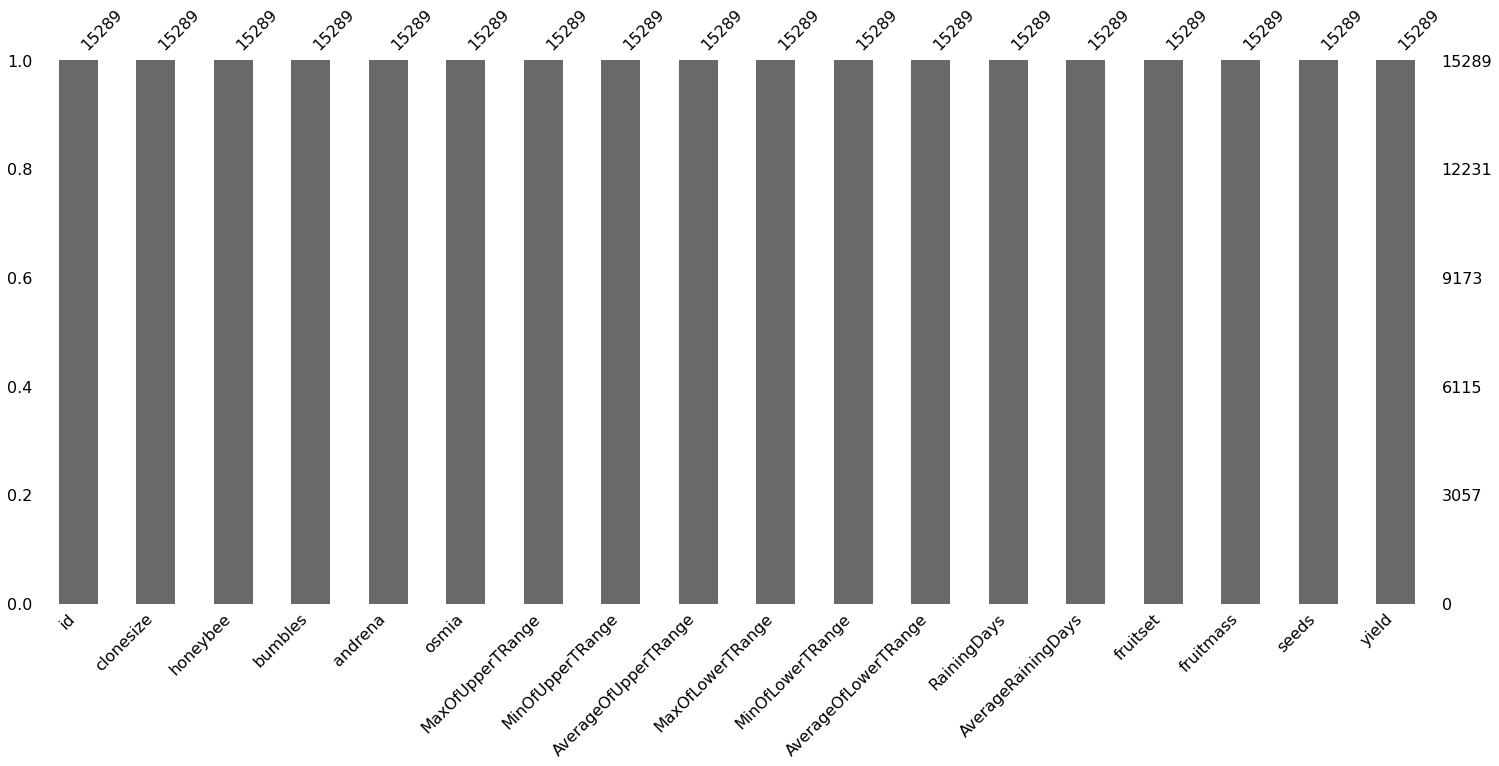

In [84]:
"""pengecekan value baris setiap kolom"""
misno.bar(buat_eda)

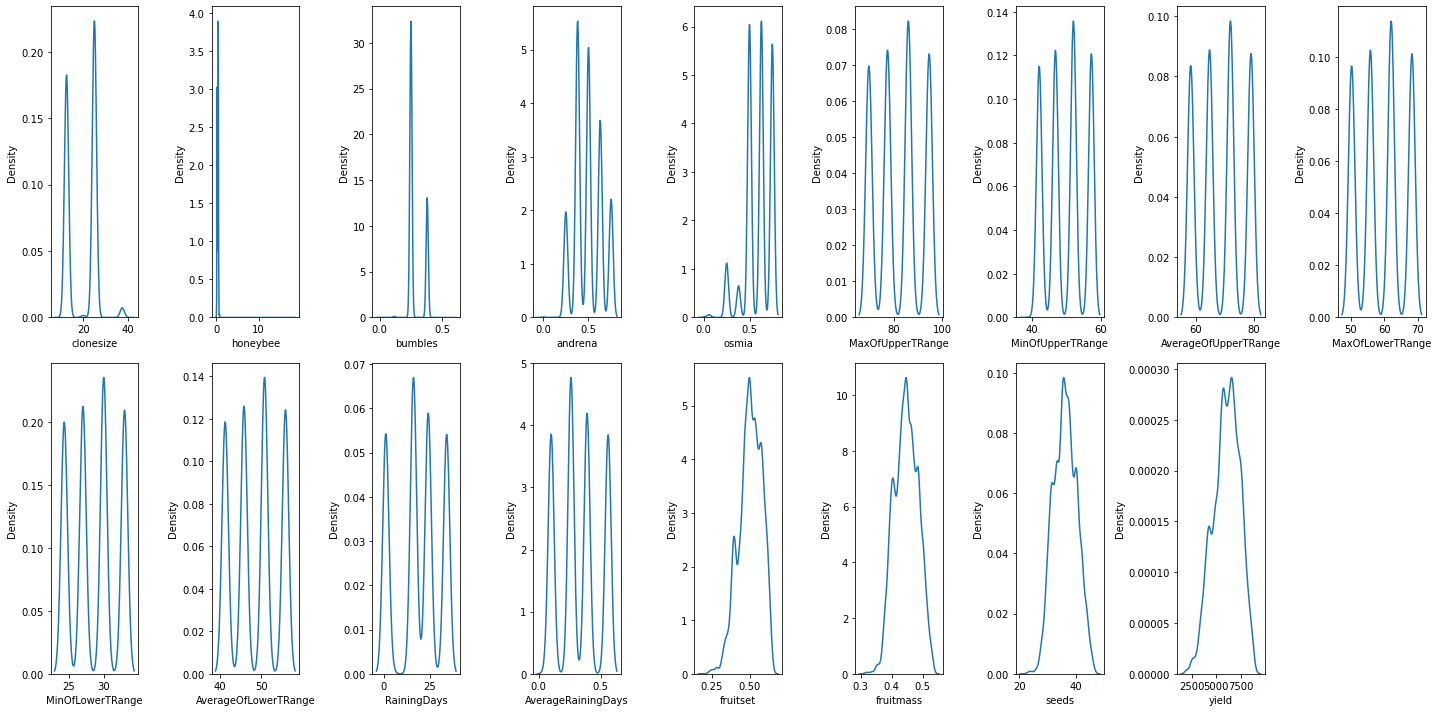

In [85]:
"""pengecekan value baris setiap kolom"""
plt.figure(figsize=(20,10))
for i in enumerate(buat_eda.drop(columns=["id"])):
    plt.subplot(2,9,i[0]+1)
    sns.kdeplot(buat_eda[i[1]])
    plt.tight_layout()

In [86]:
buat_eda.corr()[['yield']]

,yield
id,0.000975
clonesize,-0.382619
honeybee,-0.118001
bumbles,0.161145
andrena,0.073969
osmia,0.198264
MaxOfUpperTRange,-0.022517
MinOfUpperTRange,-0.021929
AverageOfUpperTRange,-0.021940
MaxOfLowerTRange,-0.022197


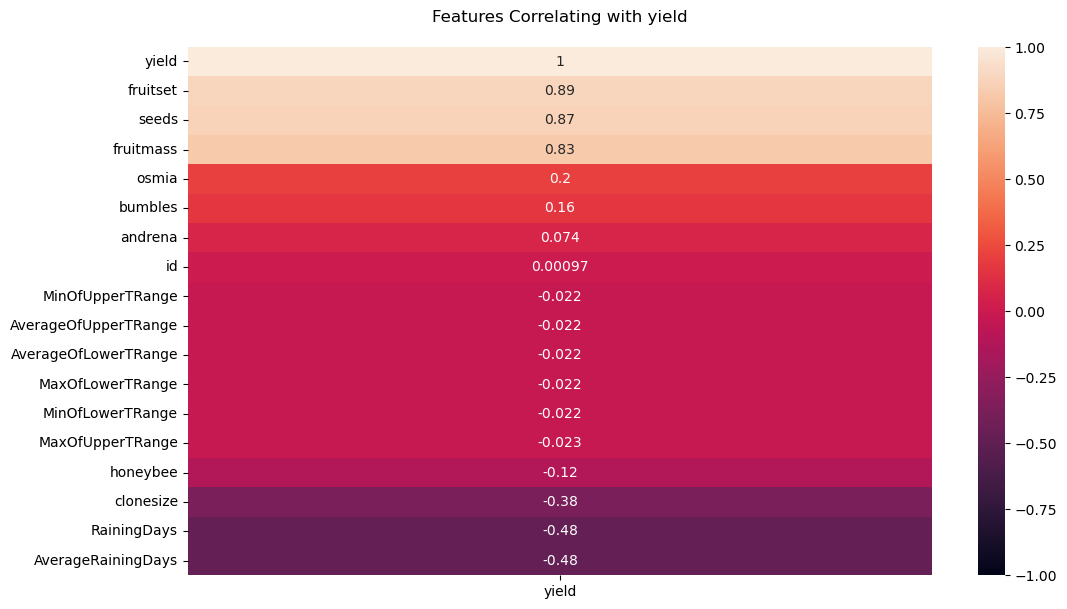

In [87]:



plt.figure (figsize = (12, 7), dpi = 100)
heatmap = sns.heatmap (buat_eda.corr()[['yield']].sort_values (by = 'yield', ascending = False), vmin = -1, vmax = 1, annot = True)
heatmap.set_title ('Features Correlating with yield', fontdict = {'fontsize':12}, pad = 18);

# Preprocessing

In [88]:
#droping minus correlation
train = train.drop(['MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange','AverageRainingDays'],axis =1)
test = test.drop(['MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange','AverageRainingDays'],axis =1)

### label encoder menggunakan np.unique

In [89]:
"""mengubah fitur numerik yang dianggap diskrit menjadi fitur kategorikal"""

to_cat = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange','RainingDays']
for cat in to_cat:
    unique_values = np.unique(np.concatenate((train[cat].unique(), test[cat].unique())))
    # print(unique_values)
    train[cat] = pd.Categorical(train[cat], categories=unique_values, ordered=True)
    test[cat] = pd.Categorical(test[cat], categories=unique_values, ordered=True)
    train[cat] = train[cat].cat.codes
    test[cat] = test[cat].cat.codes

In [90]:
"""checking null"""


print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


In [91]:
"""checking null"""
print(train.isnull().sum())
print(test.isnull().sum())

id                  0
clonesize           0
honeybee            0
bumbles             0
andrena             0
osmia               0
MaxOfUpperTRange    0
RainingDays         0
fruitset            0
fruitmass           0
seeds               0
yield               0
dtype: int64
id                  0
clonesize           0
honeybee            0
bumbles             0
andrena             0
osmia               0
MaxOfUpperTRange    0
RainingDays         0
fruitset            0
fruitmass           0
seeds               0
dtype: int64


In [92]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
# train.iloc[:,8:] =scaler.fit_transform(train.iloc[:,8:])
test.iloc[:,8:] =scaler.fit_transform(test.iloc[:,8:])

# Machine Learning



In [93]:
def eval_regression(ytest,ytrain,test_pred,train_pred):
    print("MAE_Test: %.3f" % mean_absolute_error(ytest, test_pred)) 
    print("RMSE_Test: %.3f" % mean_squared_error(ytest, test_pred, squared=False)) 
    print('R2 score:_Test %.3f' % r2_score(ytest, test_pred))
    print("=================================================\n=================================================")
    print("MAE_Train: %.3f" % mean_absolute_error(ytrain, train_pred)) 
    print("RMSE_Train: %.3f" % mean_squared_error(ytrain, train_pred, squared=False)) 
    print('R2 score:_Train %.3f' % r2_score(ytrain, train_pred))
    
    
    
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [94]:
### Buang id
id_aja=test["id"].copy()
test.drop(columns=["id"],inplace=True)

In [95]:
X = train.drop(columns=['id','yield'])
y = train.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)


X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)




In [96]:
"""Linear Regression"""

LR=LinearRegression()
LR.fit(X_train, y_train)
test_pred=LR.predict(X_test)
train_pred=LR.predict(X_train)
eval_regression(y_test,y_train,test_pred,train_pred)
print("Train: %.4f" % LR.score(X_train,y_train),"Test: %.4f" % LR.score(X_test,y_test))

MAE_Test: 376.293
RMSE_Test: 585.958
R2 score:_Test 0.809
MAE_Train: 370.567
RMSE_Train: 582.424
R2 score:_Train 0.810
Train: 0.8099 Test: 0.8087


In [97]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
test_pred=rf.predict(X_test)
train_pred=rf.predict(X_train)
eval_regression(y_test,y_train,test_pred,train_pred)
rf.score(X_train,y_train),rf.score(X_test,y_test)

MAE_Test: 371.018
RMSE_Test: 582.655
R2 score:_Test 0.811
MAE_Train: 137.366
RMSE_Train: 219.402
R2 score:_Train 0.973


(0.9730210850613927, 0.8108067270196718)

In [98]:
## Tuning 
n_estimators=[50,100]
criterion=['friedman_mse']
max_depth=[40]
min_samples_leaf=[32]
max_features=[ None]
bootstrap=[True,False]
min_samples_split=[64]
n_jobs=[-1]
oob_score=[False]






hyper=dict(max_depth=max_depth,bootstrap=bootstrap,n_jobs=n_jobs,criterion=criterion,min_samples_split=min_samples_split,
max_features=max_features,min_samples_leaf=min_samples_leaf,oob_score=oob_score,n_estimators=n_estimators)
rf=RandomForestRegressor(random_state=42)
asd=GridSearchCV(rf,hyper,cv=5,scoring='neg_mean_absolute_error')

bestmodel=asd.fit(X_train,y_train)
test_pred=bestmodel.predict(X_test)
train_pred=bestmodel.predict(X_train)
eval_regression(y_test,y_train,test_pred,train_pred)
print("---------------------------------------------\n--------------")
show_best_hyperparameter(bestmodel.best_estimator_, hyper)
print("Train: %.4f" % bestmodel.score(X_train,y_train),"Test: %.4f" % bestmodel.score(X_test,y_test))

MAE_Test: 355.620
RMSE_Test: 565.033
R2 score:_Test 0.822
MAE_Train: 334.232
RMSE_Train: 541.030
R2 score:_Train 0.836
---------------------------------------------
--------------
Best max_depth: 40
Best bootstrap: True
Best n_jobs: -1
Best criterion: friedman_mse
Best min_samples_split: 64
Best max_features: None
Best min_samples_leaf: 32
Best oob_score: False
Best n_estimators: 100
Train: -334.2316 Test: -355.6196


In [99]:
grad=GradientBoostingRegressor()
grad.fit(X_train, y_train)
test_pred=grad.predict(X_test)
train_pred=grad.predict(X_train)
eval_regression(y_test,y_train,test_pred,train_pred)
grad.score(X_train,y_train),grad.score(X_test,y_test)

MAE_Test: 356.946
RMSE_Test: 564.390
R2 score:_Test 0.822
MAE_Train: 341.685
RMSE_Train: 540.985
R2 score:_Train 0.836


(0.8359729972251282, 0.8224819595738014)

In [100]:
## Tuning 
loss=['absolute_error']
learning_rate=[0.1]
n_estimators=[300]
subsample=[0.1]
criterion=["friedman_mse",]
min_samples_split=[2]
min_samples_leaf=[4,8]
min_weight_fraction_leaf=[0.0]
max_depth=[3]


hyper_grad=dict(loss=loss, learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,criterion=criterion,min_samples_split=min_samples_split,
min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,max_depth=max_depth)


grad=GradientBoostingRegressor()
grad_bost=GridSearchCV(grad,hyper_grad,cv=5,scoring="neg_mean_absolute_error")
grad_bost_bust=grad_bost.fit(X_train,y_train)
test_pred=grad_bost.predict(X_test)
train_pred=grad_bost.predict(X_train)
eval_regression(y_test,y_train,test_pred,train_pred)
show_best_hyperparameter(grad_bost_bust.best_estimator_, hyper_grad)
print("Train: %.4f" % grad_bost_bust.score(X_train,y_train),"Test: %.4f" % grad_bost_bust.score(X_test,y_test))

MAE_Test: 349.725
RMSE_Test: 565.658
R2 score:_Test 0.822
MAE_Train: 337.995
RMSE_Train: 560.759
R2 score:_Train 0.824
Best loss: absolute_error
Best learning_rate: 0.1
Best n_estimators: 300
Best subsample: 0.1
Best criterion: friedman_mse
Best min_samples_split: 2
Best min_samples_leaf: 8
Best min_weight_fraction_leaf: 0.0
Best max_depth: 3
Train: -337.9947 Test: -349.7247


In [101]:
"""apply to model grad_tuning regression"""

blind_pred = grad_bost.predict(test)
test_pred=pd.DataFrame(blind_pred,columns=["yield"])
test_pred=pd.concat([id_aja,test_pred],axis=1)
test_pred.to_csv('gradient_tuning.csv', index=False)

In [102]:
"""apply to model grad regression"""

blind_pred = grad.predict(test)
test_pred=pd.DataFrame(blind_pred,columns=["yield"])
test_pred=pd.concat([id_aja,test_pred],axis=1)
test_pred.to_csv('gradient.csv', index=False)

NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
"""apply to model linear regression"""

blind_pred = LR.predict(test)
test_pred=pd.DataFrame(blind_pred,columns=["yield"])
test_pred=pd.concat([id_aja,test_pred],axis=1)
test_pred.to_csv('linear.csv', index=False)


In [ ]:
"""apply to model random forest"""

randomforest = rf.predict(test)
test_pred=pd.DataFrame(randomforest,columns=["yield"])
test_pred=pd.concat([id_aja,test_pred],axis=1)
test_pred.to_csv('random.csv', index=False)


In [ ]:
"""apply to model random blind"""

randomforest = bestmodel.predict(test)
test_pred=pd.DataFrame(randomforest,columns=["yield"])
test_pred=pd.concat([id_aja,test_pred],axis=1)
test_pred.to_csv('tuning.csv', index=False)